In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import numpy as np
import pandas as pd
import math

In [ ]:
df =pd.read_csv("/gdrive/Shareddrives/FYP Project/Dataset/FoodData_modified.csv")

In [ ]:
df

,Name,Group,Glycemic index,Insulin index,Serving Size,Acidity (Based on PRAL),GI Category,Calories (kcal),Net Carbs ( grams),Protein (g),...,Phenylalanine (mg),Valine (mg),Histidine (mg),Cholesterol (mg),Saturated Fat (g),Monounsaturated Fat (g),Polyunsaturated fat (g),Starch (g),Fructose (g),Trans Fat (g)
0,"Bread, wheat, toasted",baked-products,60.0,100,1 oz (28.35 grams),4.9 (acidic),medium,313,51.07,12.96,...,0.32,0.31,0.15,0.0,0.99,1.02,1.72,NaN,NaN,NaN
1,"Biscuits, plain or buttermilk, prepared from r...",baked-products,44.0,48,1 oz (28.35 grams),3.4 (acidic),low,353,43.10,7.00,...,0.35,0.31,0.16,3.0,4.32,6.93,4.16,NaN,NaN,NaN
2,"Bread, french or vienna (includes sourdough)",baked-products,70.0,NaN,1 oz (28.35 grams),5.2 (acidic),medium,272,49.68,10.75,...,NaN,NaN,NaN,0.0,0.53,0.36,0.86,44.23,0.51,0.01
3,"Cake, chocolate, prepared from recipe without ...",baked-products,41.0,82,"1 piece (1/12 of 9"" dia) (95 grams)",2 (acidic),low,371,51.80,5.30,...,0.27,0.28,0.12,58.0,5.43,6.04,2.76,NaN,NaN,NaN
4,"Cake, fruitcake, commercially prepared",baked-products,53.0,NaN,1 piece (43 grams),-0.7 (alkaline),low,324,57.90,2.90,...,0.14,0.14,0.07,5.0,1.05,4.20,3.32,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,"Cabbage, napa, cooked",vegetables,32.0,NaN,1 cup (109 grams),-1.2 (alkaline),low,12,2.23,1.10,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.00
622,"Grape leaves, raw",vegetables,NaN,NaN,1 leaf (3 grams),-6.8 (alkaline),NaN,93,6.31,5.60,...,NaN,NaN,NaN,0.0,0.34,0.08,1.07,NaN,NaN,0.00
623,"Peppers, ancho, dried",vegetables,NaN,NaN,1 pepper (17 grams),-41.1 (alkaline),NaN,281,29.82,11.86,...,0.36,0.49,0.23,0.0,0.82,0.49,4.51,NaN,NaN,0.00
624,"Epazote, raw",vegetables,NaN,NaN,1 tbsp (0.8 grams),-16.7 (alkaline),NaN,32,3.64,0.33,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.00


In [ ]:
df.describe()

,Glycemic index,Calories (kcal),Net Carbs ( grams),Protein (g),Fats (g),Carbs (g),Net carbs (g),Sugar (g),Fiber (g),Calcium (mg),...,Phenylalanine (mg),Valine (mg),Histidine (mg),Cholesterol (mg),Saturated Fat (g),Monounsaturated Fat (g),Polyunsaturated fat (g),Starch (g),Fructose (g),Trans Fat (g)
count,550.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,485.000000,581.000000,621.000000,...,427.000000,428.000000,426.000000,601.000000,597.000000,590.000000,590.000000,112.000000,184.000000,343.000000
mean,35.363636,216.998403,19.527412,8.220064,10.756198,22.770831,19.541757,9.053361,3.479174,107.190016,...,0.457611,0.521425,0.994038,30.079867,3.570285,4.307458,2.804780,12.125000,2.168859,0.124927
std,25.224070,188.224764,23.340832,9.186056,18.993655,25.012394,23.333177,16.763168,7.061645,308.883300,...,0.442380,0.511791,10.456163,87.005710,7.407209,9.187711,9.073928,18.773504,6.001451,0.863885
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,60.250000,2.532500,1.202500,0.300000,3.592500,2.532500,0.420000,0.000000,12.000000,...,0.080000,0.090000,0.040000,0.000000,0.050000,0.050000,0.090000,0.000000,0.040000,0.000000
50%,33.000000,165.500000,9.360000,4.145000,2.005000,13.050000,9.375000,2.500000,1.500000,30.000000,...,0.320000,0.320000,0.160000,0.000000,0.600000,0.595000,0.450000,1.745000,0.490000,0.000000
75%,54.000000,327.000000,28.497500,13.370000,13.887500,33.457500,28.497500,8.550000,3.300000,91.000000,...,0.750000,0.892500,0.460000,30.000000,3.680000,4.840000,1.922500,16.417500,1.565000,0.000000
max,104.000000,902.000000,99.980000,75.160000,100.000000,99.980000,99.980000,99.800000,70.100000,5876.000000,...,2.350000,2.310000,153.000000,1085.000000,82.480000,72.960000,153.000000,73.300000,55.600000,14.890000


In [ ]:
df.columns

Index(['Name', 'Group', 'Glycemic index', 'Insulin index', 'Serving Size',
       'Acidity (Based on PRAL)', 'GI Category', 'Calories (kcal)',
       'Net Carbs ( grams)', 'Protein (g)', 'Fats (g)', 'Carbs (g)',
       'Net carbs (g)', 'Sugar (g)', 'Fiber (g)', 'Calcium (mg)', 'Iron (mg)',
       'Magnesium (mg)', 'Phosphorus (mg)', 'Potassium (mg)', 'Sodium (mg)',
       'Zinc (mg)', 'Copper (mg)', 'Vitamin A (IU)', 'Vitamin E (mg)',
       'Vitamin D (µg)', 'Vitamin C (mg)', 'Vitamin B1 (mg)',
       'Vitamin B2 (mg)', 'Vitamin B3 (mg)', 'Vitamin B5 (mg)',
       'Vitamin B6 (mg)', 'Folate (µg)', 'Vitamin B12 (µg)', 'Vitamin K (µg)',
       'Tryptophan (mg)', 'Threonine (mg)', 'Isoleucine (mg)', 'Leucine (mg)',
       'Lysine (mg)', 'Methionine (mg)', 'Phenylalanine (mg)', 'Valine (mg)',
       'Histidine (mg)', 'Cholesterol (mg)', 'Saturated Fat (g)',
       'Monounsaturated Fat (g)', 'Polyunsaturated fat (g)', 'Starch (g)',
       'Fructose (g)', 'Trans Fat (g)'],
      dtype='obje

In [ ]:
dataset = df.drop(labels=['Insulin index', 'Serving Size', 'Acidity (Based on PRAL)', 'Net Carbs ( grams)'], axis = 1)

In [ ]:
dataset

,Name,Group,Glycemic index,GI Category,Calories (kcal),Protein (g),Fats (g),Carbs (g),Net carbs (g),Sugar (g),...,Phenylalanine (mg),Valine (mg),Histidine (mg),Cholesterol (mg),Saturated Fat (g),Monounsaturated Fat (g),Polyunsaturated fat (g),Starch (g),Fructose (g),Trans Fat (g)
0,"Bread, wheat, toasted",baked-products,60.0,medium,313,12.96,4.27,55.77,51.07,6.42,...,0.32,0.31,0.15,0.0,0.99,1.02,1.72,NaN,NaN,NaN
1,"Biscuits, plain or buttermilk, prepared from r...",baked-products,44.0,low,353,7.00,16.30,44.60,43.10,2.18,...,0.35,0.31,0.16,3.0,4.32,6.93,4.16,NaN,NaN,NaN
2,"Bread, french or vienna (includes sourdough)",baked-products,70.0,medium,272,10.75,2.42,51.88,49.68,4.62,...,NaN,NaN,NaN,0.0,0.53,0.36,0.86,44.23,0.51,0.01
3,"Cake, chocolate, prepared from recipe without ...",baked-products,41.0,low,371,5.30,15.10,53.40,51.80,NaN,...,0.27,0.28,0.12,58.0,5.43,6.04,2.76,NaN,NaN,NaN
4,"Cake, fruitcake, commercially prepared",baked-products,53.0,low,324,2.90,9.10,61.60,57.90,27.42,...,0.14,0.14,0.07,5.0,1.05,4.20,3.32,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,"Cabbage, napa, cooked",vegetables,32.0,low,12,1.10,0.17,2.23,2.23,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.00
622,"Grape leaves, raw",vegetables,NaN,NaN,93,5.60,2.12,17.31,6.31,6.30,...,NaN,NaN,NaN,0.0,0.34,0.08,1.07,NaN,NaN,0.00
623,"Peppers, ancho, dried",vegetables,NaN,NaN,281,11.86,8.20,51.42,29.82,NaN,...,0.36,0.49,0.23,0.0,0.82,0.49,4.51,NaN,NaN,0.00
624,"Epazote, raw",vegetables,NaN,NaN,32,0.33,0.52,7.44,3.64,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.00


In [ ]:
dataset.dropna(subset = ['Glycemic index'], inplace=True)

In [ ]:
dataset = dataset.fillna(0)

In [ ]:
dataset['GI Category'] = dataset['GI Category'].map({'low':0, 'medium':1, 'high':2})

In [ ]:
dataset


,Name,Group,Glycemic index,GI Category,Calories (kcal),Protein (g),Fats (g),Carbs (g),Net carbs (g),Sugar (g),...,Phenylalanine (mg),Valine (mg),Histidine (mg),Cholesterol (mg),Saturated Fat (g),Monounsaturated Fat (g),Polyunsaturated fat (g),Starch (g),Fructose (g),Trans Fat (g)
0,"Bread, wheat, toasted",baked-products,60.0,1,313,12.96,4.27,55.77,51.07,6.42,...,0.32,0.31,0.15,0.0,0.99,1.02,1.72,0.00,0.00,0.00
1,"Biscuits, plain or buttermilk, prepared from r...",baked-products,44.0,0,353,7.00,16.30,44.60,43.10,2.18,...,0.35,0.31,0.16,3.0,4.32,6.93,4.16,0.00,0.00,0.00
2,"Bread, french or vienna (includes sourdough)",baked-products,70.0,1,272,10.75,2.42,51.88,49.68,4.62,...,0.00,0.00,0.00,0.0,0.53,0.36,0.86,44.23,0.51,0.01
3,"Cake, chocolate, prepared from recipe without ...",baked-products,41.0,0,371,5.30,15.10,53.40,51.80,0.00,...,0.27,0.28,0.12,58.0,5.43,6.04,2.76,0.00,0.00,0.00
4,"Cake, fruitcake, commercially prepared",baked-products,53.0,0,324,2.90,9.10,61.60,57.90,27.42,...,0.14,0.14,0.07,5.0,1.05,4.20,3.32,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,"Tomato juice, canned, without salt added",vegetables,31.0,0,17,0.85,0.29,3.53,3.13,2.58,...,0.03,0.02,0.01,0.0,0.02,0.01,0.03,0.00,1.33,0.00
618,"Pimento, canned",vegetables,45.0,0,23,1.10,0.30,5.10,3.20,2.71,...,0.03,0.05,0.02,0.0,0.05,0.02,0.16,0.00,0.00,0.00
620,"Broccoli, chinese, cooked",vegetables,32.0,0,22,1.14,0.72,3.81,1.31,0.84,...,0.00,0.00,0.00,0.0,0.11,0.05,0.33,0.00,0.00,0.00
621,"Cabbage, napa, cooked",vegetables,32.0,0,12,1.10,0.17,2.23,2.23,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=dbc99999dcfc2d8048cea6fc3be3397035f4178f42b00533dd805a66ad761b2b
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [ ]:
from minisom import MiniSom

In [ ]:
target = dataset['GI Category'].values

In [ ]:
label_names = {0:'low', 1:'medium', 2:'high'}

In [ ]:
target

array([1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 1, 2, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 2, 0, 1, 2, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 1, 2,
       1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0,
       0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [ ]:
dataset.columns

Index(['Name', 'Group', 'Glycemic index', 'GI Category', 'Calories (kcal)',
       'Protein (g)', 'Fats (g)', 'Carbs (g)', 'Net carbs (g)', 'Sugar (g)',
       'Fiber (g)', 'Calcium (mg)', 'Iron (mg)', 'Magnesium (mg)',
       'Phosphorus (mg)', 'Potassium (mg)', 'Sodium (mg)', 'Zinc (mg)',
       'Copper (mg)', 'Vitamin A (IU)', 'Vitamin E (mg)', 'Vitamin D (µg)',
       'Vitamin C (mg)', 'Vitamin B1 (mg)', 'Vitamin B2 (mg)',
       'Vitamin B3 (mg)', 'Vitamin B5 (mg)', 'Vitamin B6 (mg)', 'Folate (µg)',
       'Vitamin B12 (µg)', 'Vitamin K (µg)', 'Tryptophan (mg)',
       'Threonine (mg)', 'Isoleucine (mg)', 'Leucine (mg)', 'Lysine (mg)',
       'Methionine (mg)', 'Phenylalanine (mg)', 'Valine (mg)',
       'Histidine (mg)', 'Cholesterol (mg)', 'Saturated Fat (g)',
       'Monounsaturated Fat (g)', 'Polyunsaturated fat (g)', 'Starch (g)',
       'Fructose (g)', 'Trans Fat (g)'],
      dtype='object')

In [ ]:
train_columns = ["Calories (kcal)", 'Protein (g)','Fats (g)','Net carbs (g)', 'Carbs (g)', 'Fiber (g)', 'Sugar (g)','Vitamin E (mg)', 'Vitamin C (mg)', 'Vitamin B1 (mg)']

In [ ]:
data = dataset[train_columns]

In [ ]:
data

,Calories (kcal),Protein (g),Fats (g),Net carbs (g),Carbs (g),Fiber (g),Sugar (g),Vitamin E (mg),Vitamin C (mg),Vitamin B1 (mg)
0,313,12.96,4.27,51.07,55.77,4.7,6.42,0.24,0.2,0.44
1,353,7.00,16.30,43.10,44.60,1.5,2.18,0.00,0.2,0.36
2,272,10.75,2.42,49.68,51.88,2.2,4.62,0.21,0.0,0.71
3,371,5.30,15.10,51.80,53.40,1.6,0.00,0.00,0.2,0.14
4,324,2.90,9.10,57.90,61.60,3.7,27.42,0.90,0.5,0.05
...,...,...,...,...,...,...,...,...,...,...
617,17,0.85,0.29,3.13,3.53,0.4,2.58,0.32,70.1,0.10
618,23,1.10,0.30,3.20,5.10,1.9,2.71,0.69,84.9,0.02
620,22,1.14,0.72,1.31,3.81,2.5,0.84,0.48,28.2,0.10
621,12,1.10,0.17,2.23,2.23,0.0,0.00,0.00,3.2,0.01


In [ ]:
# data standardization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values

In [ ]:
data

array([[ 4.76824189e-01,  4.88551725e-01, -3.53085213e-01, ...,
        -2.22110313e-01, -3.40797189e-01,  2.23077337e-05],
       [ 6.87064132e-01, -1.55668120e-01,  2.63451825e-01, ...,
        -2.78147318e-01, -3.40797189e-01, -1.22469458e-02],
       [ 2.61328248e-01,  2.49671547e-01, -4.47897642e-01, ...,
        -2.29114939e-01, -3.47235718e-01,  4.14310385e-02],
       ...,
       [-1.05267139e+00, -7.89078906e-01, -5.35022576e-01, ...,
        -1.66073307e-01,  5.60596861e-01, -5.21220198e-02],
       [-1.10523138e+00, -7.93402529e-01, -5.63210055e-01, ...,
        -2.78147318e-01, -2.44219255e-01, -6.59249301e-02],
       [ 3.24400231e-01,  8.75356805e-02, -5.34510077e-01, ...,
        -2.78147318e-01, -3.47235718e-01, -6.43912734e-02]])

In [ ]:
no_of_neurons = math.floor(5*math.sqrt(np.shape(data)[0]))
no_of_neurons

117

In [ ]:
# Initialization and training
n_neurons = 9
m_neurons = 13
som = MiniSom(n_neurons, m_neurons, data.shape[1], sigma=1.5, learning_rate=.5,
              activation_distance='euclidean',topology='hexagonal', 
              neighborhood_function='gaussian', random_seed=0)

som.pca_weights_init(data)
som.train(data, 1000, verbose=True)  # random training

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.6543964466340833


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib.lines import Line2D

from bokeh.colors import RGB
from bokeh.io import curdoc, show, output_notebook
from bokeh.transform import factor_mark, factor_cmap
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure, output_file

# display matplotlib plots in notebook
%matplotlib inline
# display bokeh plot in notebook
output_notebook()

In [ ]:
xx, yy = som.get_euclidean_coordinates()
umatrix = som.distance_map()
weights = som.get_weights()

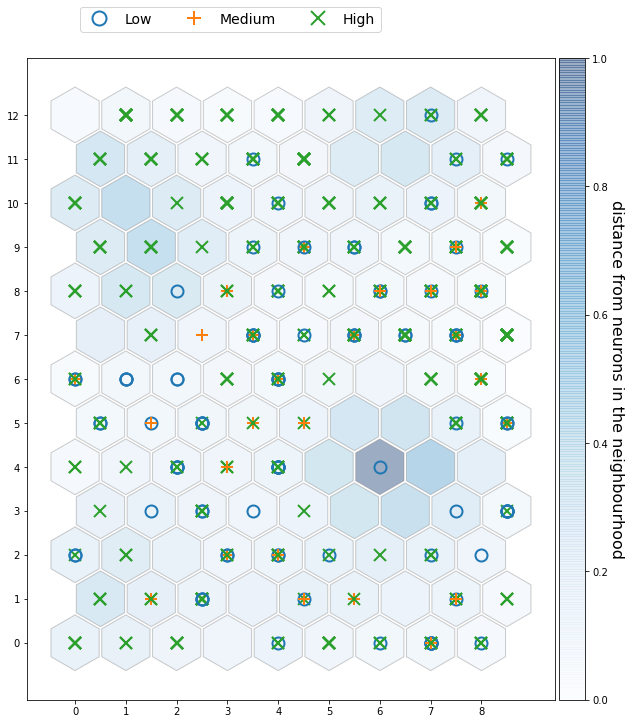

In [ ]:
f = plt.figure(figsize=(10,13))
ax = f.add_subplot(111)

ax.set_aspect('equal')

# iteratively add hexagons
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        wy = yy[(i, j)] * np.sqrt(3) / 2
        hex = RegularPolygon((xx[(i, j)], wy), 
                             numVertices=6, 
                             radius=.95 / np.sqrt(3),
                             facecolor=cm.Blues(umatrix[i, j]), 
                             alpha=.4, 
                             edgecolor='gray')
        ax.add_patch(hex)

markers = ['o', '+', 'x']
colors = ['C0', 'C1', 'C2']
for cnt, x in enumerate(data):
    # getting the winner
    w = som.winner(x)
    # place a marker on the winning position for the sample xx
    wx, wy = som.convert_map_to_euclidean(w) 
    wy = wy * np.sqrt(3) / 2
    plt.plot(wx, wy, 
             markers[target[cnt]-1], 
             markerfacecolor='None',
             markeredgecolor=colors[target[cnt]-1], 
             markersize=12, 
             markeredgewidth=2)

xrange = np.arange(weights.shape[0])
yrange = np.arange(weights.shape[1])
plt.xticks(xrange-.5, xrange)
plt.yticks(yrange * np.sqrt(3) / 2, yrange)

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = colorbar.ColorbarBase(ax_cb, cmap=cm.Blues, 
                            orientation='vertical', alpha=.4)
cb1.ax.get_yaxis().labelpad = 16
cb1.ax.set_ylabel('distance from neurons in the neighbourhood',
                  rotation=270, fontsize=16)
plt.gcf().add_axes(ax_cb)

legend_elements = [Line2D([0], [0], marker='o', color='C0', label='Low',
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                   Line2D([0], [0], marker='+', color='C1', label='Medium',
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                   Line2D([0], [0], marker='x', color='C2', label='High',
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2)]
ax.legend(handles=legend_elements, bbox_to_anchor=(0.1, 1.08), loc='upper left', 
          borderaxespad=0., ncol=3, fontsize=14)

plt.show()

In [ ]:
hex_centre_col, hex_centre_row = [], []
hex_colour = []
label = []

# define labels
GI_CATEGORIES = ['Low', 'Medium', 'High']

for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        wy = yy[(i, j)] * np.sqrt(3) / 2
        hex_centre_col.append(xx[(i, j)])
        hex_centre_row.append(wy)
        hex_colour.append(cm.Blues(umatrix[i, j]))

weight_x, weight_y = [], []
for cnt, i in enumerate(data):
    w = som.winner(i)
    wx, wy = som.convert_map_to_euclidean(xy=w)
    wy = wy * np.sqrt(3) / 2
    weight_x.append(wx)
    weight_y.append(wy)
    label.append(GI_CATEGORIES[target[cnt]-1])
    
# convert matplotlib colour palette to bokeh colour palette
hex_plt = [(255 * np.array(i)).astype(int) for i in hex_colour]
hex_bokeh = [RGB(*tuple(rgb)).to_hex() for rgb in hex_plt]

In [ ]:
# initialise figure/plot
fig = figure(title="SOM: Hexagonal Topology",
             plot_height=800, plot_width=800,
             match_aspect=True,
             tools="wheel_zoom,save,reset")

# create data stream for plotting
source_hex = ColumnDataSource(
    data = dict(
        x=hex_centre_col,
        y=hex_centre_row,
        c=hex_bokeh
    )
)

source_pages = ColumnDataSource(
    data=dict(
        wx=weight_x,
        wy=weight_y,
        gi_category=label
    )
)

# define markers
MARKERS = ['diamond', 'cross', 'x']

# add shapes to plot
fig.hex(x='y', y='x', source=source_hex,
        size=135 * (.95 / np.sqrt(3)) ,
        alpha=.4,
        line_color='gray',
        fill_color='c')

fig.scatter(x='wy', y='wx', source=source_pages, 
            legend_field='gi_category',
            size=20, 
            marker=factor_mark(field_name='gi_category', markers=MARKERS, factors=GI_CATEGORIES),
            color=factor_cmap(field_name='gi_category', palette='Category10_3', factors=GI_CATEGORIES))

# add hover-over tooltip
fig.add_tools(HoverTool(
    tooltips=[
        ("label", '@gi_category'),
        ("(x,y)", '($x, $y)')],
    mode="mouse", 
    point_policy="follow_mouse"
))

show(fig)

In [ ]:
print(umatrix)

[[0.22695443 0.37428658 0.23517133 0.22645869 0.08472404 0.09991338
  0.05899756 0.26645026 0.18466734 0.34462519 0.33699621 0.4003485
  0.07165719]
 [0.25173534 0.26314154 0.31446485 0.22204261 0.15994044 0.12306555
  0.12154558 0.25726768 0.3902465  0.4819165  0.49089926 0.27673823
  0.1197987 ]
 [0.1749021  0.19829342 0.22020531 0.17503041 0.15063011 0.13531479
  0.11649489 0.16125522 0.36826806 0.30499053 0.34174091 0.14909176
  0.07544163]
 [0.16187848 0.21259186 0.16308388 0.15047136 0.15227223 0.13079251
  0.10615313 0.083811   0.19973594 0.17633679 0.19439824 0.12142994
  0.06568527]
 [0.19248648 0.24312249 0.17585443 0.19391892 0.18152414 0.1857239
  0.10089058 0.08005866 0.09661923 0.1461495  0.14675536 0.11293638
  0.06878953]
 [0.1505918  0.22056904 0.23484847 0.40898118 0.40491158 0.40141551
  0.13301649 0.10692594 0.10266311 0.14973818 0.17568926 0.32937064
  0.17147401]
 [0.11833946 0.19127247 0.2764613  0.46571453 1.         0.41803951
  0.15057153 0.08940849 0.1021029 

In [ ]:
print(weights)

[[[ 4.52114368e-01  5.71608757e-01 -1.39027008e-02 ...  3.75946875e+00
    1.25271545e-01 -2.91140553e-02]
  [ 6.32349716e-01  1.51750346e+00 -1.12121164e-01 ...  4.42907915e-01
   -1.39465259e-01 -3.78573757e-03]
  [ 7.67391675e-01  3.74884752e+00 -1.06885165e-01 ... -8.76343273e-02
   -1.57814612e-01 -5.30350931e-03]
  ...
  [ 3.10406330e+00 -4.71405799e-01  3.99359597e+00 ...  5.65098304e+00
   -3.41076222e-01 -4.78701714e-02]
  [ 1.53391596e+00  1.16562166e+00  1.80991544e+00 ...  1.97706975e+00
   -3.40794583e-01 -3.68951434e-02]
  [ 8.45887291e-01  1.58600031e+00  1.02658394e+00 ...  3.06715307e-01
   -3.44644983e-01 -5.01147429e-02]]

 [[ 6.02817859e-01  6.76194967e-01  1.21964223e-01 ...  6.24343066e-01
   -1.40281649e-01 -2.45948957e-02]
  [ 8.48964722e-01  1.02558473e+00  2.25762462e-01 ... -6.93794780e-02
   -1.40115032e-01  6.71979897e-03]
  [ 7.51881490e-01  1.73030527e+00  1.30733715e-01 ... -1.07392240e-02
    1.88345225e-01 -3.78229013e-03]
  ...
  [ 2.52681975e+00 -8.3

In [ ]:
weights.shape

(9, 13, 10)

In [ ]:
temp = []

for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        wy = yy[(i, j)] * np.sqrt(3) / 2
        temp.append([xx[(i, j)], wy, umatrix[i, j]])

print(temp)

[[-0.5, 0.0, 0.22695443236547663], [0.0, 0.8660254037844386, 0.37428657914150526], [-0.5, 1.7320508075688772, 0.23517133062726303], [0.0, 2.598076211353316, 0.22645869404377086], [-0.5, 3.4641016151377544, 0.08472403642870201], [0.0, 4.330127018922193, 0.09991338341564751], [-0.5, 5.196152422706632, 0.05899755869988497], [0.0, 6.06217782649107, 0.26645025844877773], [-0.5, 6.928203230275509, 0.18466734479587912], [0.0, 7.794228634059947, 0.3446251915784664], [-0.5, 8.660254037844386, 0.33699620527057417], [0.0, 9.526279441628825, 0.40034850370051434], [-0.5, 10.392304845413264, 0.07165718542241253], [0.5, 0.0, 0.251735336670462], [1.0, 0.8660254037844386, 0.26314154321907046], [0.5, 1.7320508075688772, 0.3144648458365908], [1.0, 2.598076211353316, 0.22204261073851062], [0.5, 3.4641016151377544, 0.1599404398314264], [1.0, 4.330127018922193, 0.12306555208046394], [0.5, 5.196152422706632, 0.12154558224756654], [1.0, 6.06217782649107, 0.25726767727084415], [0.5, 6.928203230275509, 0.390246

In [ ]:
arr = np.array(temp)

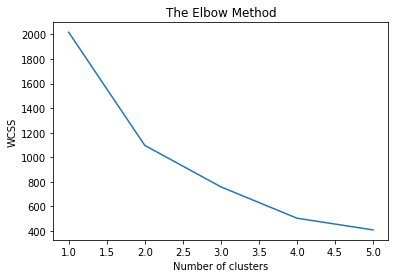

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(arr)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 6), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(arr)
y_kmeans = kmeans.fit_predict(arr)
y_kmeans

array([1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 2, 1, 2, 3, 0, 3, 0, 3, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
arr[y_kmeans==0, 0].shape

(28,)

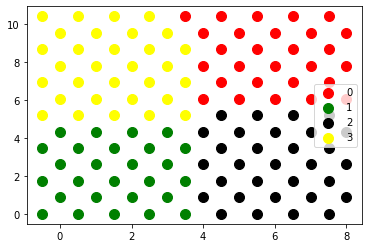

In [ ]:
plt.scatter(arr[y_kmeans==0,0],arr[y_kmeans==0, 1], s=100, c="red", label="0")
plt.scatter(arr[y_kmeans==1,0],arr[y_kmeans==1, 1], s=100, c="green", label="1")
plt.scatter(arr[y_kmeans==2,0],arr[y_kmeans==2, 1], s=100, c="black", label="2")
plt.scatter(arr[y_kmeans==3,0],arr[y_kmeans==3, 1], s=100, c="yellow", label="3")

plt.legend()

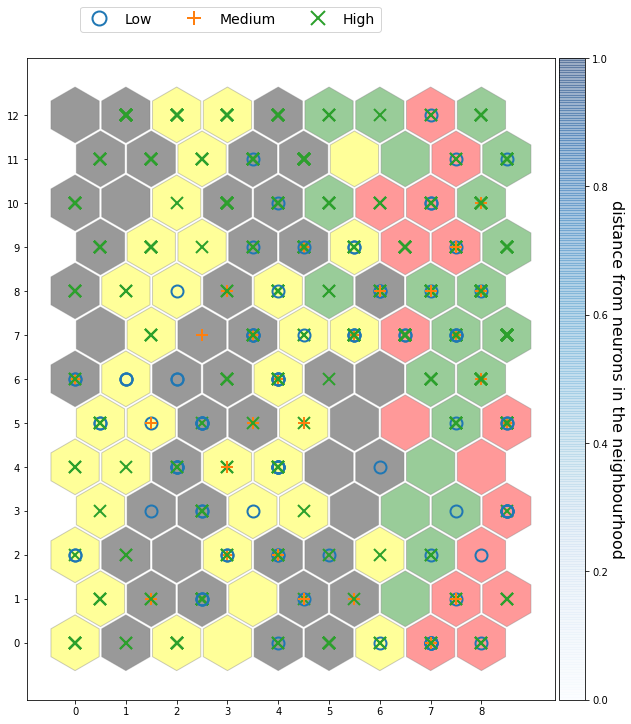

In [ ]:
f = plt.figure(figsize=(10,13))
ax = f.add_subplot(111)

ax.set_aspect('equal')
colours = ["red","yellow", "green", "black"]
# iteratively add hexagons
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        wy = yy[(i, j)] * np.sqrt(3) / 2
        hex = RegularPolygon((xx[(i, j)], wy), 
                             numVertices=6, 
                             radius=.95 / np.sqrt(3),
                             facecolor=colours[y_kmeans[i*weights.shape[0] + j ] ], 
                             alpha=.4, 
                             edgecolor='gray')
        ax.add_patch(hex)

markers = ['o', '+', 'x']
colors = ['C0', 'C1', 'C2']
for cnt, x in enumerate(data):
    # getting the winner
    w = som.winner(x)
    # place a marker on the winning position for the sample xx
    wx, wy = som.convert_map_to_euclidean(w) 
    wy = wy * np.sqrt(3) / 2
    plt.plot(wx, wy, 
             markers[target[cnt]-1], 
             markerfacecolor='None',
             markeredgecolor=colors[target[cnt]-1], 
             markersize=12, 
             markeredgewidth=2)

xrange = np.arange(weights.shape[0])
yrange = np.arange(weights.shape[1])
plt.xticks(xrange-.5, xrange)
plt.yticks(yrange * np.sqrt(3) / 2, yrange)

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = colorbar.ColorbarBase(ax_cb, cmap=cm.Blues, 
                            orientation='vertical', alpha=.4)
cb1.ax.get_yaxis().labelpad = 16
cb1.ax.set_ylabel('distance from neurons in the neighbourhood',
                  rotation=270, fontsize=16)
plt.gcf().add_axes(ax_cb)

legend_elements = [Line2D([0], [0], marker='o', color='C0', label='Low',
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                   Line2D([0], [0], marker='+', color='C1', label='Medium',
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                   Line2D([0], [0], marker='x', color='C2', label='High',
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2)]
ax.legend(handles=legend_elements, bbox_to_anchor=(0.1, 1.08), loc='upper left', 
          borderaxespad=0., ncol=3, fontsize=14)

plt.show()

In [ ]:
hex_centre_col, hex_centre_row = [], []
hex_colour = []
label = []

# define labels
GI_CATEGORIES = ['Low', 'Medium', 'High']
COLOURS = ["#ff0000","#ff00ff", "#00ff00", "#ffff11"]
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        wy = yy[(i, j)] * np.sqrt(3) / 2
        hex_centre_col.append(xx[(i, j)])
        hex_centre_row.append(wy)
        hex_colour.append(COLOURS[y_kmeans[i*weights.shape[0] + j ] ])

weight_x, weight_y = [], []
for cnt, i in enumerate(data):
    w = som.winner(i)
    wx, wy = som.convert_map_to_euclidean(xy=w)
    wy = wy * np.sqrt(3) / 2
    weight_x.append(wx)
    weight_y.append(wy)
    label.append(GI_CATEGORIES[target[cnt]-1])
    
# convert matplotlib colour palette to bokeh colour palette
# hex_plt = [(255 * np.array(i)).astype(int) for i in hex_colour]
hex_bokeh = hex_colour#[RGB(*tuple(rgb)).to_hex() for rgb in hex_plt]

In [ ]:
# initialise figure/plot
fig = figure(title="SOM: Hexagonal Topology",
             plot_height=800, plot_width=800,
             match_aspect=True,
             tools="wheel_zoom,save,reset")

# create data stream for plotting
source_hex = ColumnDataSource(
    data = dict(
        x=hex_centre_col,
        y=hex_centre_row,
        c=hex_bokeh
    )
)

source_pages = ColumnDataSource(
    data=dict(
        wx=weight_x,
        wy=weight_y,
        gi_category=label
    )
)

# define markers
MARKERS = ['diamond', 'cross', 'x']

# add shapes to plot
fig.hex(x='y', y='x', source=source_hex,
        size=135 * (.95 / np.sqrt(3)) ,
        alpha=.4,
        line_color='gray',
        fill_color='c')

fig.scatter(x='wy', y='wx', source=source_pages, 
            legend_field='gi_category',
            size=20, 
            marker=factor_mark(field_name='gi_category', markers=MARKERS, factors=GI_CATEGORIES),
            color=factor_cmap(field_name='gi_category', palette='Category10_3', factors=GI_CATEGORIES))

# add hover-over tooltip
fig.add_tools(HoverTool(
    tooltips=[
        ("label", '@gi_category'),
        ("(x,y)", '($x, $y)')],
    mode="mouse", 
    point_policy="follow_mouse"
))

show(fig)

In [ ]:
new_dataset = dataset.reset_index(drop=True)

In [ ]:
temp_df= []
for cnt, i in enumerate(data):
    w = som.winner(i)
    wx, wy = som.convert_map_to_euclidean(xy=w)
    temp_df.append([
        new_dataset['Name'][cnt],
        new_dataset['Group'][cnt],
        new_dataset['GI Category'][cnt],
        new_dataset['Calories (kcal)'][cnt], 
        new_dataset['Protein (g)'][cnt], 
        new_dataset['Fats (g)'][cnt],
        new_dataset['Net carbs (g)'][cnt],
        new_dataset['Carbs (g)'][cnt],
        new_dataset['Fiber (g)'][cnt],
        new_dataset['Sugar (g)'][cnt],
        new_dataset['Vitamin E (mg)'][cnt],
        new_dataset['Vitamin C (mg)'][cnt],
        new_dataset['Vitamin B1 (mg)'][cnt],
        y_kmeans[w[0] *weights.shape[0] + w[1] ]])

som_df = pd.DataFrame(temp_df, columns=['Name', 'Group', 'GI', 'Calories (kcal)', 'Protein (g)','Fats (g)','Net carbs (g)', 'Carbs (g)', 'Fiber (g)', 'Sugar (g)','Vitamin E (mg)', 'Vitamin C (mg)', 'Vitamin B1 (mg)', 'Category'])

In [ ]:
grouped_som_df = som_df.groupby("Category")


In [ ]:
grouped_som_df.get_group(0).to_csv(r'/gdrive/Shareddrives/FYP Project/Dataset/FoodData_group0.csv')

In [ ]:
grouped_som_df.get_group(1).to_csv(r'/gdrive/Shareddrives/FYP Project/Dataset/FoodData_group1.csv')

In [ ]:
grouped_som_df.get_group(2).to_csv(r'/gdrive/Shareddrives/FYP Project/Dataset/FoodData_group2.csv')

In [ ]:
grouped_som_df.get_group(3).to_csv(r'/gdrive/Shareddrives/FYP Project/Dataset/FoodData_group3.csv')